## Scientific Computing 2021: Homework Assignment 2 
Due Monday October 18, 2021 (23:59)

In [8]:
import numpy as np
import matplotlib.pyplot as plt



### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

In [8]:
import numpy as np
from numpy import linalg as LA

####1. Condition number:

If $\|\cdot\|$ is the $l^2$-norm and $A$ is arbitrary, then $$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$$

$\begin{array}{l}A_{q}=\left(\begin{array}{ll}1 & q \\ 0 & 1\end{array}\right), A_{q}^{\top}=\left(\begin{array}{ll}1 & 0 \\ q & 1\end{array}\right) \\ A_{q}^{\top} A_{q}=\left(\begin{array}{ll}1 & 0 \\ q & 1\end{array}\right)\left(\begin{array}{ll}1 & q \\ 0 & 1\end{array}\right)=\left(\begin{array}{ll}1 & q \\ q & q^{2}+1\end{array}\right)\\ \left|\begin{array}{c}1-\lambda & q \\ q & q^{2}+1-\lambda\end{array}\right|=(1-\lambda)\left(q^{2}+1-\lambda\right)-q^{2}= \\ =-\lambda q^{2}+(1-\lambda)^{2}=0 \Rightarrow \lambda^{2}-\left(2+q^{2}\right) \lambda+1=0 \\ \lambda=\frac{2+q^{2} \pm \sqrt{\left(2+q^{2}\right)^{2}-4}}{2}=\frac{2+q^{2} \pm |q| \cdot \sqrt{q^{2}+4}}{2} \\ \kappa(A)=\sqrt{\frac{\lambda_{max}}{\lambda_{\min }}}=\sqrt{\frac{2+q^{2}+|q| \sqrt{q^{2}+4}}{2+q^{2}-|q| \sqrt{q^{2}+4}}}=\frac{2+q^{2}+|q| \sqrt{q^{2}+4}}{\sqrt{\left(2+q^{2}\right)^{2}-q^{2}\left(q^{2}+4\right)}} = \frac{2+q^{2}+|q| \sqrt{q^{2}+4}}{2} \end{array} $

In [ ]:
q = 10000000
Aq = np.array([[1, q],[0,1]])
print('( numpy )Condition number: ', np.linalg.cond(Aq))
K = (2+q**2+abs(q)*(q**2+4)**0.5)/2
print('(formula)Condition number: ',K)

( numpy )Condition number:  100000000000002.0
(formula)Condition number:  100000000000002.0


####2. Example:

In [ ]:
q = 10000000
Aq = np.array([[1, q],[0,1]])
x = np.array([1,10000])
dx = np.array([10,0])
b = np.matmul(Aq,x)
db = np.matmul(Aq,dx)
print('q = ',q, ' b = ', b, ' db = ', db)
print(LA.norm(dx)/LA.norm(x) > 10**6*LA.norm(db)/LA.norm(b))

q =  10000000  b =  [100000000001        10000]  db =  [10  0]
True


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

####Code:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def tan_der_1(x,h):
  return (np.tan(x+h)-np.tan(x))/h
def tan_der_2(x,h):
  return (np.tan(x+h)-np.tan(x-h))/(2*h) 
def tan_der_true(x):
  return 1/np.cos(x)**2

In [11]:
h = np.zeros(17)
der_1 = np.zeros(17)
der_2 = np.zeros(17)
der_true = tan_der_true(1)
err_1 = np.zeros(17)
err_2 = np.zeros(17)
for k in range (17):
  h[k] = 10**(-k)
  der_1[k] = tan_der_1(1,h[k])
  der_2[k] = tan_der_2(1,h[k])
  err_1[k] = abs(der_1[k]-der_true)/abs(der_true)
  err_2[k] = abs(der_2[k]-der_true)/abs(der_true)

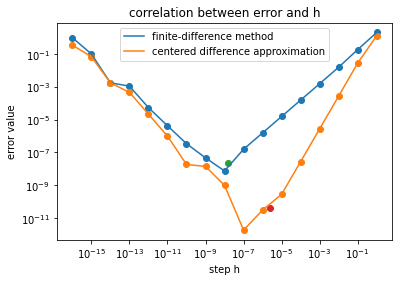

In [41]:

plt.scatter(h,err_1)
plt.scatter(h,err_2)
plt.plot(h,err_1)
plt.plot(h,err_2)
plt.xlabel('step h')
plt.ylabel('error value')
plt.title('correlation between error and h')
plt.legend(['finite-difference method','centered difference approximation'])

plt.xscale('log')
plt.yscale('log')
plt.show()


In [24]:
min_err_1, min_err_2 = min(err_1), min(err_2)
min_h_1, min_h_2 = int(np.argmin(err_1)), int(np.argmin(err_2))
print(f"minimum value of the error is {min_err_1} at h_exp_1 = {10**(-min_h_1)} for the first method;\nminimum value of the error is {min_err_2} at h_exp_2 = {10**(-min_h_2)} for the second method.")

minimum value of the error is 7.456200013106232e-09 at h = 1e-08 for the first method;
minimum value of the error is 1.8169248518588702e-12 at h = 1e-07 for the second method.


####Theory:

As we can see, error is not always go down when the time step decreases. This happens because when the function is calculated using floating-point arithmetic If step size is chosen too small, the subtraction will yield a large rounding error.
From the article [Numerical Differentiation](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap11.pdf) we can obtain the formula for the optimal time step for the **first method**:


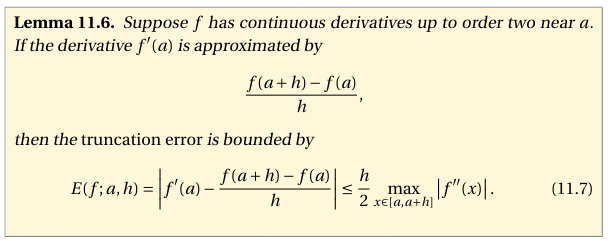
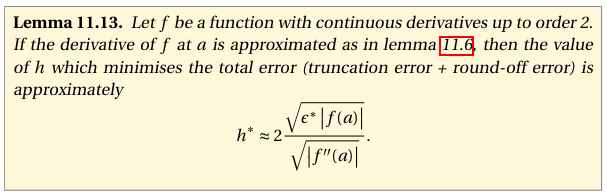

$\tan'(x) = \dfrac{1}{\cos^2 x}, \tan''(x) = -2 \cos^{-3}x \Rightarrow h^*(x) \approx \sqrt{2 \varepsilon \cos x},\quad h^*(x=1)=\sqrt{2 \varepsilon \cos 1} $

In [40]:
epsilon = np.finfo(np.float).eps
h_opt1 = (2*epsilon*np.cos(1))**0.5
print("h*_1 = ",h_opt1)

h*_1 =  1.549007501896453e-08


Earlier it was deduced that "minimum value of the error is 7.456200013106232e-09 at h = 1e-08 for the first method". This $h \approx h^*$ which means that experiment corresponds to theory. Now let's look at the **second method**:

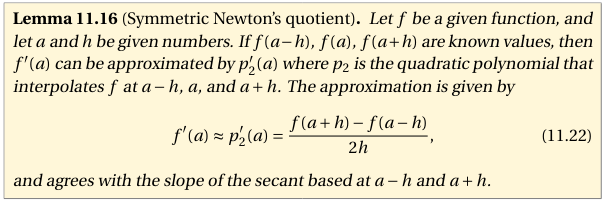
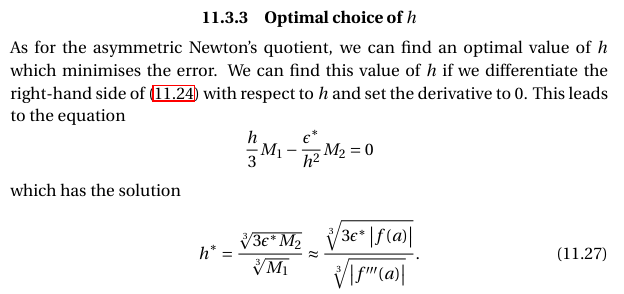

$\tan'(x) = \dfrac{1}{\cos^2 x}, \tan''(x) = -2 \cos^{-3}x,\tan'''(x) = 6\cos^{-4}x \Rightarrow h^*(x) \approx \sqrt[3]{0.5 \varepsilon \tan x \cdot \cos^4 x},\\
h^*(x=1)=\sqrt[3]{0.5 \varepsilon \tan 1 \cdot \cos^4 1} $

In [39]:
epsilon = np.finfo(np.float).eps
h_opt2 = (0.5*epsilon*np.tan(1)*np.cos(1)**4)**(1/3)
print("h*_2 = ",h_opt2)

h*_2 =  2.4516206988646803e-06


$h^*_2$ deviates from experimental optimal h by an order of magnitude 10 but nevertheless the fact that optimal h for the second experiment > optimal h for the first experiment is true

####Comparison

Graph with added points corresponding to theoretical optimal h:\
The first method has the error $\sim \Delta t$ and the second one has the error $\sim \Delta t^2$, that's why the second method has a lower error value

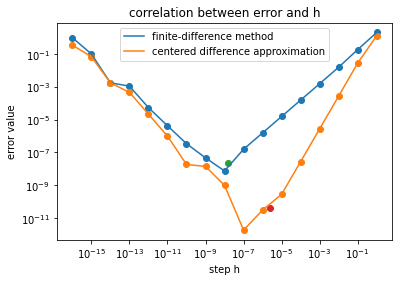

In [42]:
plt.scatter(h,err_1)
plt.scatter(h,err_2)
plt.scatter(h_opt1,abs(tan_der_1(1,h_opt1)-der_true)/abs(der_true))
plt.scatter(h_opt2,abs(tan_der_2(1,h_opt2)-der_true)/abs(der_true))
plt.plot(h,err_1)
plt.plot(h,err_2)
plt.xlabel('step h')
plt.ylabel('error value')
plt.title('correlation between error and h')
plt.legend(['finite-difference method','centered difference approximation'])

plt.xscale('log')
plt.yscale('log')
plt.show()

### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

regularized regression: $$\|A{\mathbf x}-\mathbf{b}\|^2+\mu \|\mathbf x\|^2\to\min_{\mathbf x}$$
regularization parameter: $$\mu$$
(`Xtrain`, `Ytrain`,`Xtest`) $\rightarrow$ `Ypred`

####First repository

We want to construct a linear predictive model for the last column (Relative location of the image) using all previous columns except the ID (the first column). 

Download and extract the compressed dataset to the folder `CTslices_dir` as a `.csv` file:

In [115]:
from urllib.request import urlretrieve
import zipfile


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip'
urlretrieve(url, 'CTslices')
print ('downloaded OK')

zip_ref = zipfile.ZipFile('CTslices', 'r')
zip_ref.extractall('CTslices_dir')
zip_ref.close()
print ('extracted OK')

downloaded OK
extracted OK


Import and preprocess the data:

In [85]:
data = np.loadtxt('CTslices_dir/slice_localization_data.csv', skiprows=1, delimiter=',')
print ('Total rows:', data.shape[0])
print ('Total columns:', data.shape[1])

N = len(data)
A = data[:,:-1] # input values
A[:,0] = 1 # remove the ID column, insert constants instead
b = data[:,-1] # output values

Total rows: 53500
Total columns: 386


We want to demonstrate that a reasonably accurate linear model may be constructed using a small part of data, so we randomly divide the total set into a small training set and the remaining test set.

We will use the training data to estimate the regression coefficients:

$$\widetilde{\mathbf c}= (A^t_{\mathrm train}A_{\mathrm train}+\mu)^{-1}A_{\mathrm train}^t\mathbf b_{\mathrm train}$$

Then, we can use the estimated coefficients to make prediction on the test data:

$$\mathbf b_{\mathrm pred}=A_{\mathrm test}\widetilde{\mathbf c}$$

Let us check the eigenvalues of the matrix $A_{\mathrm train}^tA_{\mathrm train}:$

In [99]:
Ntrain = 300

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
Atrain = A[train]
btrain = b[train]
Atest = A[test]
btest = b[test]
Q = Atrain.T.dot(Atrain)

Compute the RRMSE prediction error on the test set.

In [107]:
def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

y1 = Atrain.T.dot(btrain)
mu = 1
step = 10
MU = []
RRMSE = []
while abs(step) > 10**(-8):
  MU.append(mu)
  coeffs1 = np.linalg.inv(Q+mu*np.eye(Atrain.shape[1])).dot(y1)
  bpred1 = Atest.dot(coeffs1)
  RRMSE1 = getRRMSE(btest, bpred1)
  RRMSE.append(RRMSE1)
  mu+=step
  if mu == 0:
    mu-=step
    step/=2
    continue
  if mu <= 0:
    mu*=(-1)
    step*=(-1)
  coeffs2 = np.linalg.inv(Q+mu*np.eye(Atrain.shape[1])).dot(y1)
  bpred2 = Atest.dot(coeffs2)
  RRMSE2 = getRRMSE(btest, bpred2)
  if RRMSE2 > RRMSE1:
    step*=(-0.5)

In [106]:
print('mu = ',mu)
print('step = ',step)
print('RRMSE = ', RRMSE[-1])

mu =  14.158074412494898
step =  9.313225746154785e-09
RRMSE =  0.4644591160641214


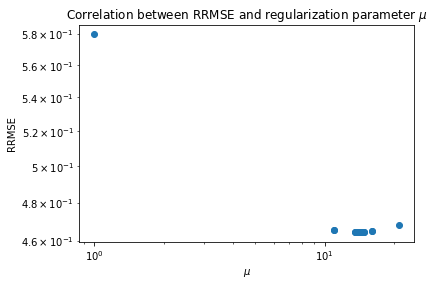

In [103]:
plt.scatter(MU,RRMSE)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\mu$')
plt.ylabel('RRMSE')
plt.title('Correlation between RRMSE and regularization parameter $\mu$')
plt.show()

Compare with standard implementations of regression: 

In [105]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR
    
model = Ridge()
model.fit(Atrain, btrain)
bpred_ridge = model.predict(Atest)
print ('RRMS error for Ridge model:', getRRMSE(btest, bpred_ridge))

model = LR()
model.fit(Atrain, btrain)
bpred_lr = model.predict(Atest)
print ('RRMS error for LR model:', getRRMSE(btest, bpred_lr))

print('RRMS error for regularization model = ', RRMSE[-1])

RRMS error for Ridge model: 0.5821184928147978
RRMS error for LR model: 1.3924155255730168
RRMS error for regularization model =  0.4644591160641214


#### Second repository

In [109]:
data = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv', skiprows=1, delimiter=',')
print ('Total rows:', data.shape[0])
print ('Total columns:', data.shape[1])

N = len(data)
A = data[:,:-1] # input values
A[:,0] = 1 # remove the ID column, insert constants instead
b = data[:,-1] # output values

Total rows: 45730
Total columns: 10


In [111]:
Ntrain = 300

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
Atrain = A[train]
btrain = b[train]
Atest = A[test]
btest = b[test]
Q = Atrain.T.dot(Atrain)

In [112]:
def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

y1 = Atrain.T.dot(btrain)
mu = 1
step = 10
MU = []
RRMSE = []
while abs(step) > 10**(-8):
  MU.append(mu)
  coeffs1 = np.linalg.inv(Q+mu*np.eye(Atrain.shape[1])).dot(y1)
  bpred1 = Atest.dot(coeffs1)
  RRMSE1 = getRRMSE(btest, bpred1)
  RRMSE.append(RRMSE1)
  mu+=step
  if mu == 0:
    mu-=step
    step/=2
    continue
  if mu <= 0:
    mu*=(-1)
    step*=(-1)
  coeffs2 = np.linalg.inv(Q+mu*np.eye(Atrain.shape[1])).dot(y1)
  bpred2 = Atest.dot(coeffs2)
  RRMSE2 = getRRMSE(btest, bpred2)
  if RRMSE2 > RRMSE1:
    step*=(-0.5)

In [113]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR
    
model = Ridge()
model.fit(Atrain, btrain)
bpred_ridge = model.predict(Atest)
print ('RRMS error for Ridge model:', getRRMSE(btest, bpred_ridge))

model = LR()
model.fit(Atrain, btrain)
bpred_lr = model.predict(Atest)
print ('RRMS error for LR model:', getRRMSE(btest, bpred_lr))

print('RRMS error for regularization model = ', RRMSE[-1])

RRMS error for Ridge model: 0.4608974350202951
RRMS error for LR model: 0.4649132332458838
RRMS error for regularization model =  0.432421327803126


### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

To solve: 
$$\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$$

Denote by index $n$ values at time $t_0+n\Delta t$, with $n$ integer or half-integer. Then 

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+3/2} &= \tilde v_{n+1/2}+f_1(\tilde x_{n+1})\Delta t
\end{align}

#### Theory

$\begin{array}{l}
\left\{\begin{array}{l}
\tilde{x}_{n+1}=\tilde{X}_{n}+\tilde{v}_{n+\frac{1}{2}} \Delta t \\
\widetilde{v}_{n+\frac{1}{2}}=\widetilde{v}_{n-\frac{1}{2}}-\frac{k}{m} \widetilde{x}_{n+1} \Delta t
\end{array}=>\tilde{x}_{n+1}=\tilde{x}_{n}\left(1-\frac{k}{m} \Delta t^{2}\right)+\widetilde{v}_{n-\frac{1}{2}} \Delta t \Rightarrow>\right.\\
\Rightarrow\left(\begin{array}{l}
\widetilde{x}_{n+1} \\
\widetilde{v}_{n+\frac{1}{2}}
\end{array}\right)=\left(\begin{array}{cc}
1-\frac{k}{m} \Delta t^{2} & \Delta t \\
-\frac{k}{m} \Delta t & 1
\end{array}\right) \cdot\left(\begin{array}{l}
\tilde{x}_{n} \\
\widetilde{v}_{n-\frac{1}{2}}
\end{array}\right)=A \cdot\left(\begin{array}{l}
\tilde{x}_{n} \\
\tilde{v}_{n-\frac{1}{2}}
\end{array}\right) \Rightarrow U[n]=\hat{A}^{n} \cdot U[0], \text { where }\\
U[n]=\left(\begin{array}{l}
\tilde{x}_{n} \\
\vec{v}_{n-\frac{1}{2}}
\end{array}\right) \Rightarrow U[n]=A^{n} \cdot\left(C_{1} \varphi_{1}+C_{2} \varphi_{2}\right)=C_{1} A^{n} \varphi_{1}+C_{2} A^{n} \varphi_{2}=C_{1} \lambda_{1}^{n} \varphi_{1}+c_{2} \lambda_{2}^{n} \varphi_{2}\\
\text { where } \varphi_{1,2} \text { - eigenvectors and } \lambda_{1,2} \text { - eigenvalues }\\
U[n] \underset{n \rightarrow \infty}{\longrightarrow} \infty \text { if }\left|\lambda_{1}\right| or\left|\lambda_{2}\right|>1
\end{array}$\
$\left(1-\frac{k}{m} \Delta t^{2}-\lambda\right)(1-\lambda)+\frac{k}{m} \Delta t^{2}=0 \quad \lambda^{2}+\lambda\left(\frac{k}{m} \Delta t^{2}-2\right)+1=0 \\
\text{Let }  \frac{k}{m} \Delta t^{2}=P>0, \text{then } \lambda=\frac{2-P \pm \sqrt{(P-2)^{2}-4}}{2}=\frac{2-P \pm \sqrt{P(P-4)}}{2} \\
(1) P(P-4)<0 \Rightarrow \lambda \subset \mathbb{C} ,\quad
 |\lambda|=\frac{\sqrt{(2-P)^{2}+|P(P-4)|}}{2}=\frac{\sqrt{4+P^{2}-4 P+4 P-P^{2}}}{2}=1 \Rightarrow U[n] \text{ converges} \\
(2)  P(P-4) \geqslant 0 \Rightarrow P \geqslant 4, \lambda \in \mathbb{R}\\
1) \frac{2-P+\sqrt{P(P-4)}}{2}>1 \quad \sqrt{P(P-4)}>P \quad 0>4 P \Rightarrow \text{ no solution }\\
2) \frac{2-P-\sqrt{(P-4)}}{2}<-1 \quad 4-P<\sqrt{P(P-4)} \quad 16-8 P+P^{2}<P^{2}-4 P \quad 16<4 P \quad P>4 \quad \frac{k}{m} \Delta t^{2}>4$\
**So, the answer is**: the simulation diverges when $\frac{k}{m} \Delta t^{2}>4$


#### Experiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's assume that m = 1, k = 5 and $\Delta t$ = 1, then the algorithm should diverge

For dt = 0.1, 1 and k = 1 the algorithm is not diverging:

In [ ]:
def f1(x,k, m):
    return - k*x/m

def Leapfrog(f1, x0, v0, dt, N, k, m):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(x0, k, m)] # at half-integer times
    tHistory = [0]
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*f1(xHistory[-1], k, m))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory, tHistory[1:]

Error in E at dt=6.000000e-01: 1.895881e-01
Error in E at dt=7.000000e-01: 4.334834e-01
Error in E at dt=8.000000e-01: 4.141487e-02
Error in E at dt=9.000000e-01: 2.157405e-01
Error in E at dt=1.000000e+00: 4.900500e+03
Error in E at dt=1.100000e+00: 4.273584e+66


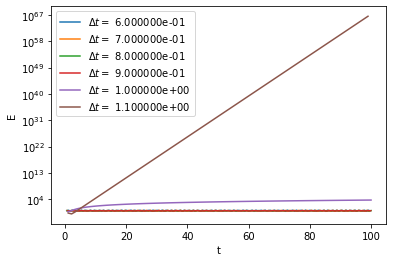

In [ ]:
m, k = 1, 4
def E(X, k, m):
    return m*X[1]*X[1]/2+k*X[0]*X[0]/2
for i in range(6,12):
    dt = 0.1*i
    xHistory, vHistory, tHistory = Leapfrog(f1, 1., 1., dt=dt, N=int(100./dt), k=k,m=m) 
    Ehistory = [E([xHistory[n], vHistory[n]],k=1,m=1) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

We can see that system starts diverging at the moment when $\dfrac{k}{m}\cdot \Delta t^2 = 4 $ as it was theoretically predicted.

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

####Theory.

Teylor Series approximation for $x$\
$x\left [ \left (n+1\right )\Delta t \right] = x\left [ \left (n+ \frac{1}{2}\right )\Delta t \right] + \dot{x}\left [ \left (n+ \frac{1}{2}\right )\Delta t \right]\cdot \dfrac{\Delta t}{2} + \dfrac{1}{2}\ddot{x}\left [ \left (n+ \frac{1}{2}\right )\Delta t \right] \cdot  \left (\dfrac{\Delta t}{2}  \right )^2 + O(\Delta t)^3$
$x\left [ n\Delta t \right] = x\left [ \left (n+ \frac{1}{2}\right )\Delta t \right] - \dot{x}\left [ \left (n+ \frac{1}{2}\right )\Delta t \right]\cdot \dfrac{\Delta t}{2} + \dfrac{1}{2}\ddot{x}\left [ \left (n+ \frac{1}{2}\right )\Delta t \right] \cdot  \left (\dfrac{\Delta t}{2}  \right )^2 + O(\Delta t)^3$

$x\left [ \left (n+1\right )\Delta t \right] - x\left [ n\Delta t \right] = \dot{x}\left [\left( n+ \frac{1}{2} \right)\Delta t \right]\cdot \Delta t + O(\Delta t)^3$  (1)

From Verlet equations: $\tilde x_{n+1} - \tilde x_{n}=\tilde v_{n+1/2}\Delta t $ \
$\tilde x\left [ \left (n+1\right )\Delta t \right] - \tilde x\left [ n\Delta t \right]=\tilde v\left [ \left (n+\dfrac{1}{2}\right )\Delta t \right]\cdot \Delta t$  (2)\
After comparing (1) and (2) we get that $\Delta x \sim O(\Delta t)^3$\
The number of points $N \sim \dfrac{1}{\Delta t} \Rightarrow \Delta x_N \sim N \cdot \Delta x \sim O(\Delta t)^2$ 


Teylor Series approximation for $v$

$v\left [ \left (n+\frac{1}{2}\right )\Delta t \right] = v\left [ n\Delta t \right] + \dot{v}\left [ n\Delta t \right]\cdot \dfrac{\Delta t}{2} + \dfrac{1}{2}\ddot{v}\left [ n\Delta t \right]\cdot  \left (\dfrac{\Delta t}{2}  \right )^2 + O(\Delta t)^3$
$v\left [ \left (n-\frac{1}{2}\right )\Delta t \right] = v\left [ n\Delta t \right] - \dot{v}\left [ n\Delta t \right]\cdot \dfrac{\Delta t}{2} + \dfrac{1}{2}\ddot{v}\left [ n\Delta t \right]\cdot  \left (\dfrac{\Delta t}{2}  \right )^2 + O(\Delta t)^3$

$v\left [ \left (n+\frac{1}{2}\right )\Delta t \right] - v\left [ \left (n-\frac{1}{2}\right )\Delta t \right] = \dot{v}\left [ n\Delta t \right]\cdot \Delta t + O(\Delta t)^3$ (3)

From Verlet equations:\
$\tilde v_{n+1/2} = \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t$   
$\tilde v_{n+1} = \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t \Rightarrow \tilde v_{n} = \tilde v_{n-1/2}+\frac{1}{2}f_1(\tilde x_{n})\Delta t$

$\tilde v\left [ \left (n+\frac{1}{2}\right )\Delta t \right]-\tilde v\left [ \left (n-\frac{1}{2}\right )\Delta t \right] = f_1(\tilde x[n\Delta t])\Delta t$ (4)\
After comparing (3) and (4) we get that $\Delta v \sim O(\Delta t)^3$\
The number of points $N \sim \dfrac{1}{\Delta t} \Rightarrow \Delta v_n \sim N \cdot \Delta v \sim O(\Delta t)^2$ 

$\Delta x_n, \Delta v_n \sim  O(\Delta t)^2 \Rightarrow$ **global convergence order = 2**

####Verification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f1(x):
    return - np.sin(x)

def Verlet(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory = [v0] # at integer times
    vHistory_ = []  # at half-integer times
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistory[-1]+0.5*dt*f1(xHistory[-1]))
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory.append(vHistory_[-1]+0.5*dt*f1(xHistory[-1]))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    #vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)
    return xHistory, vHistory, tHistory

# for m in range(0,4):
#     dt = 10**(-m)
#     xHistory, vHistory,_ = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
#     plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
# plt.xlabel('x')
# plt.ylabel('v')
# plt.legend(loc='best')  
# plt.show()

(Error in E)/dt**2 at dt=0.1: 0.1258844941146475
(Error in E)/dt**2 at dt=0.01: 0.125617532065192
(Error in E)/dt**2 at dt=0.001: 0.12561487860995868
(Error in E)/dt**2 at dt=0.0001: 0.12561426343538074
(Error in E)/dt**2 at dt=1e-05: 0.12467693544238044


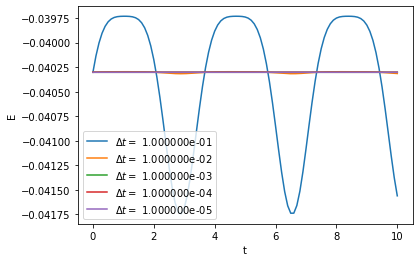

In [ ]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

for m in range(1,6):
    dt = 10**(-m)
    xHistory, vHistory, tHistory = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print (f'(Error in E)/dt**2 at dt={dt}: {(np.abs(Ehistory[-1]-Ehistory[0]))/dt**2}') 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

As you can see, $\dfrac{\Delta E}{\Delta t^2}\approx0.125 = \text{const}\Rightarrow \Delta E \sim \Delta t^2$ which proofs experimentally that Verlet method has a convergence order = 2